<h1>US Top 10K Artists and Their Popular Songs</h1>

This Kaggle dataset provides a comprehensive collection of the top 10 popular songs for each of the 10,000 most-listened-to artists in the United States.

In this exercise, you will be performing an exploratory data analysis on the spotify dataset that is available through the [Kaggle Website](https://www.kaggle.com/datasets/spoorthiuk/us-top-10k-artists-and-their-popular-songs).

First, we import some of the essential libraries.

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading the data

In [12]:
print("====== Reading Artists DF ====== ")
artists_df = pd.read_csv("Artists.csv")
print(f"Shape of artists dataframe is: {artists_df.shape}")
print(artists_df.columns)
## Renaming the column name ID to Artist ID
artists_df.rename(columns={'ID':"Artist ID"}, inplace=True)

print("====== Reading Songs DF ====== ")
songs_df = pd.read_csv("Top_Songs_US.csv")
print(songs_df.columns)
print(f"Shape of songs dataframe is: {songs_df.shape}")

====== Reading Artists DF ====== 
Shape of artists dataframe is: (9488, 9)
Index(['Name', 'ID', 'Gender', 'Age', 'Country', 'Genres', 'Popularity',
       'Followers', 'URI'],
      dtype='object')
====== Reading Songs DF ====== 
Index(['Album Type', 'Artist ID', 'Artist Name', 'Artist Song Rank',
       'Track Name', 'Is Playable', 'Album Name', 'Release Date',
       'Total Album Tracks', 'Is Explicit', 'ISRC', 'Song Duration',
       'Track Number', 'Popularity', 'Track Id', 'Track URI'],
      dtype='object')
Shape of songs dataframe is: (37146, 16)


In [13]:
artists_df.head(10)

,Name,Artist ID,Gender,Age,Country,Genres,Popularity,Followers,URI
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4
1,Post Malone,246dkjvS1zLTtiykXe5h60,male,25,US,"['dfw rap', 'melodic rap', 'pop', 'rap']",86,43130108,spotify:artist:246dkjvS1zLTtiykXe5h60
2,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,male,29,GB,"['pop', 'singer-songwriter pop', 'uk pop']",87,115998928,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V
3,J Balvin,1vyhD5VmyZ7KMfW5gqLgo5,male,35,CO,"['reggaeton', 'reggaeton colombiano', 'trap la...",83,38028010,spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5
4,Bad Bunny,4q3ewBCX7sLwd24euuV69X,male,26,PR,"['reggaeton', 'trap latino', 'urbano latino']",95,77931484,spotify:artist:4q3ewBCX7sLwd24euuV69X
5,Justin Bieber,1uNFoZAHBGtllmzznpCI3s,male,26,CA,"['canadian pop', 'pop']",88,75112165,spotify:artist:1uNFoZAHBGtllmzznpCI3s
6,Ozuna,1i8SpTcr7yvPOmcqrbnVXY,male,28,PR,"['puerto rican pop', 'reggaeton', 'trap latino...",84,38192380,spotify:artist:1i8SpTcr7yvPOmcqrbnVXY
7,Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,female,27,US,['pop'],88,95710972,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
8,Khalid,6LuN9FCkKOj5PcnpouEgny,male,22,US,"['pop', 'pop r&b']",81,16282583,spotify:artist:6LuN9FCkKOj5PcnpouEgny
9,Daddy Yankee,4VMYDCV2IEDYJArk749S6m,male,43,PR,"['latin hip hop', 'reggaeton', 'trap latino', ...",84,34243502,spotify:artist:4VMYDCV2IEDYJArk749S6m


In [14]:
songs_df.head(10)

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity,Track Id,Track URI
0,album,3TVXtAsR1Inumwj472S9r4,Drake,1,IDGAF (feat. Yeat),True,For All The Dogs,2023-10-06,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE
1,album,3TVXtAsR1Inumwj472S9r4,Drake,2,First Person Shooter (feat. J. Cole),True,For All The Dogs,2023-10-06,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU
2,album,3TVXtAsR1Inumwj472S9r4,Drake,3,Rich Baby Daddy (feat. Sexyy Red & SZA),True,For All The Dogs,2023-10-06,23,True,USUG12306085,319191,20,89,1yeB8MUNeLo9Ek1UEpsyz6,spotify:track:1yeB8MUNeLo9Ek1UEpsyz6
3,album,3TVXtAsR1Inumwj472S9r4,Drake,4,Jimmy Cooks (feat. 21 Savage),True,"Honestly, Nevermind",2022-06-17,14,True,USUG12204897,218364,14,89,3F5CgOj3wFlRv51JsHbxhe,spotify:track:3F5CgOj3wFlRv51JsHbxhe
4,album,3TVXtAsR1Inumwj472S9r4,Drake,5,One Dance,True,Views,2016-05-06,20,False,USCM51600028,173986,12,89,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0
5,album,3TVXtAsR1Inumwj472S9r4,Drake,6,MELTDOWN (feat. Drake),True,UTOPIA,2023-07-28,19,True,USSM12305021,246133,7,88,67nepsnrcZkowTxMWigSbb,spotify:track:67nepsnrcZkowTxMWigSbb
6,album,3TVXtAsR1Inumwj472S9r4,Drake,7,Virginia Beach,True,For All The Dogs,2023-10-06,23,True,USUG12306066,251094,1,85,3eP13S8D5m2cweMEg3ZDed,spotify:track:3eP13S8D5m2cweMEg3ZDed
7,album,3TVXtAsR1Inumwj472S9r4,Drake,8,Rich Flex,True,Her Loss,2022-11-04,16,True,USUG12208598,239359,1,87,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N
8,album,3TVXtAsR1Inumwj472S9r4,Drake,9,Slime You Out (feat. SZA),True,For All The Dogs,2023-10-06,23,True,USUG12306064,310490,9,80,0AYt6NMyyLd0rLuvr0UkMH,spotify:track:0AYt6NMyyLd0rLuvr0UkMH
9,album,3TVXtAsR1Inumwj472S9r4,Drake,10,God's Plan,True,Scorpion,2018-06-29,25,True,USCM51800004,198973,5,86,6DCZcSspjsKoFjzjrWoCdn,spotify:track:6DCZcSspjsKoFjzjrWoCdn


## 2. Data Visualizations
### 2.1 Age Distribution among Various Genders of Artists
In this part, we will produce a violin plot which is a type of data visualization that combines aspects of a box plot and a kernel density plot. It is used to depict the distribution and probability density of a continuous variable across different categories or groups.

In a violin plot, each category or group is represented by a "violin" shape, which consists of a symmetrical or mirrored pair of kernel density plots on each side of a central box plot.

<Axes: xlabel='Age', ylabel='Gender'>

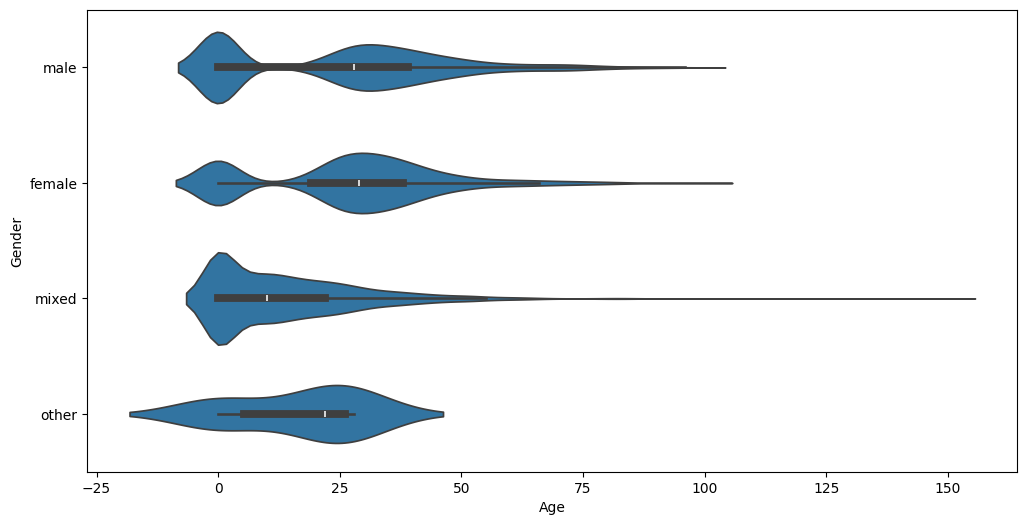

In [15]:
figsize = (12, 1.2 * len(artists_df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(artists_df, x='Age', y='Gender', inner='box')

### 2.2 Histogram of Genders across Various Countries of Artists

<Axes: xlabel='Country', ylabel='Count'>

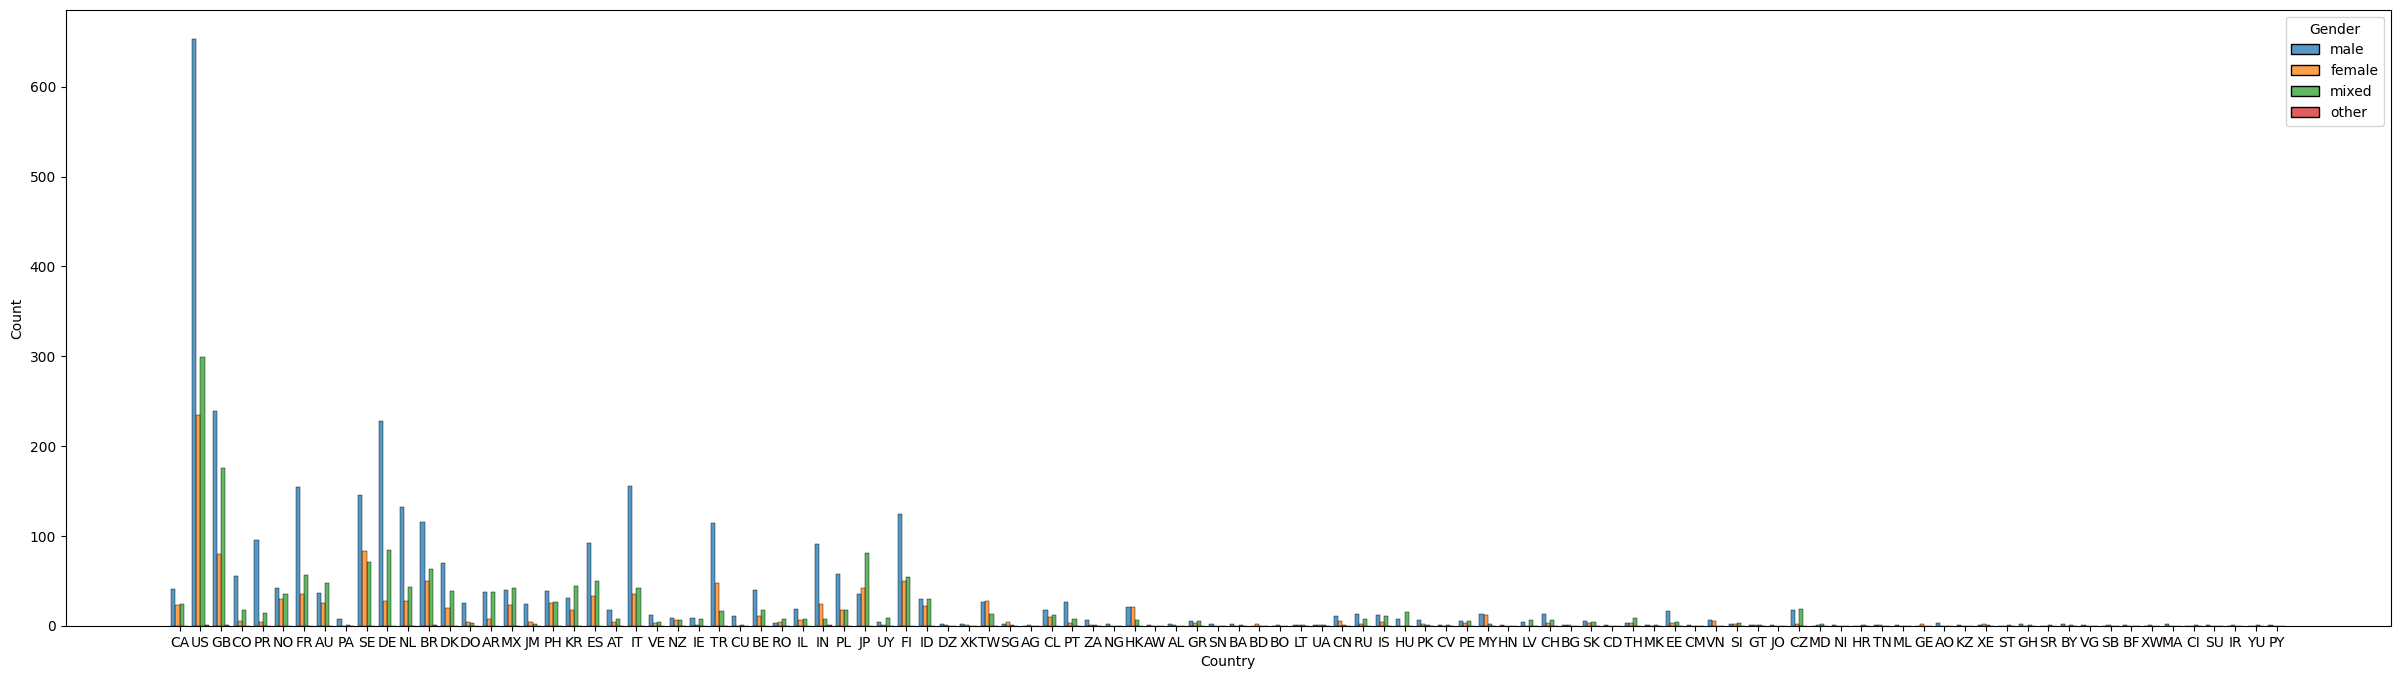

In [16]:
figsize = (30,8)
plt.figure(figsize=figsize)
sns.histplot(data=artists_df, x="Country", hue="Gender", multiple="dodge", shrink=.8)


### 2.3 Age Distribution among Artists from Different Countries

/tmp/ipython-input-622/3213505124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(artists_df, x='Age', y='Country', inner='box', palette='Dark2')


<Axes: xlabel='Age', ylabel='Country'>

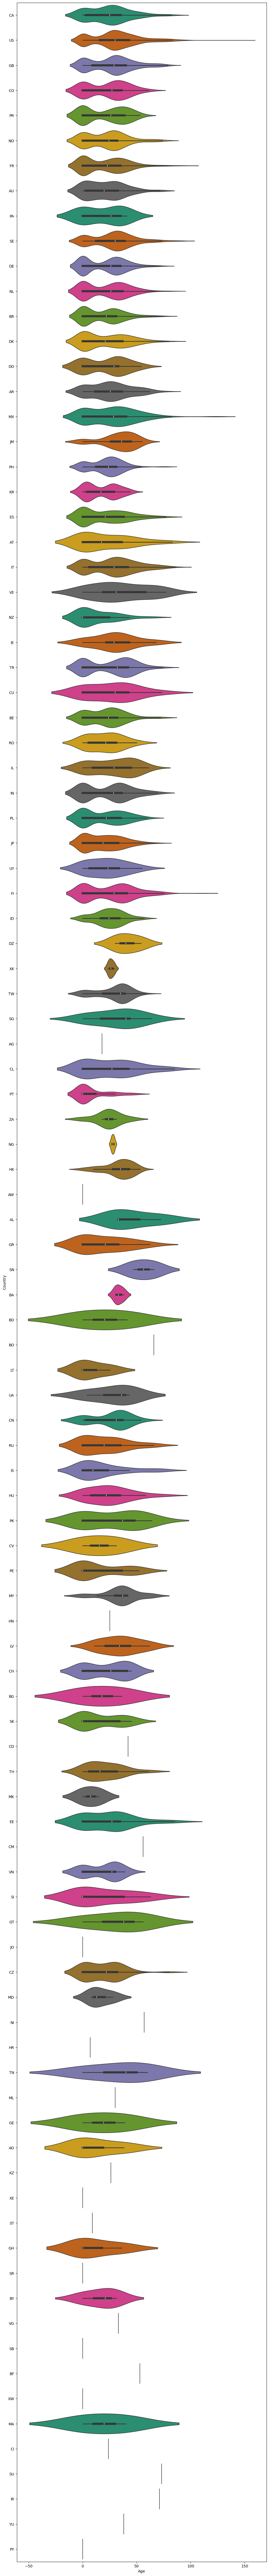

In [17]:
figsize = (12, 1.2 * len(artists_df['Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(artists_df, x='Age', y='Country', inner='box', palette='Dark2')

### 2.4 Distribution of `Followers` among Artists from Different Countries
**Question 1:** Produce this plot!

**Hint: You can refer to the code of the previous cell.**

/tmp/ipython-input-622/1156998980.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


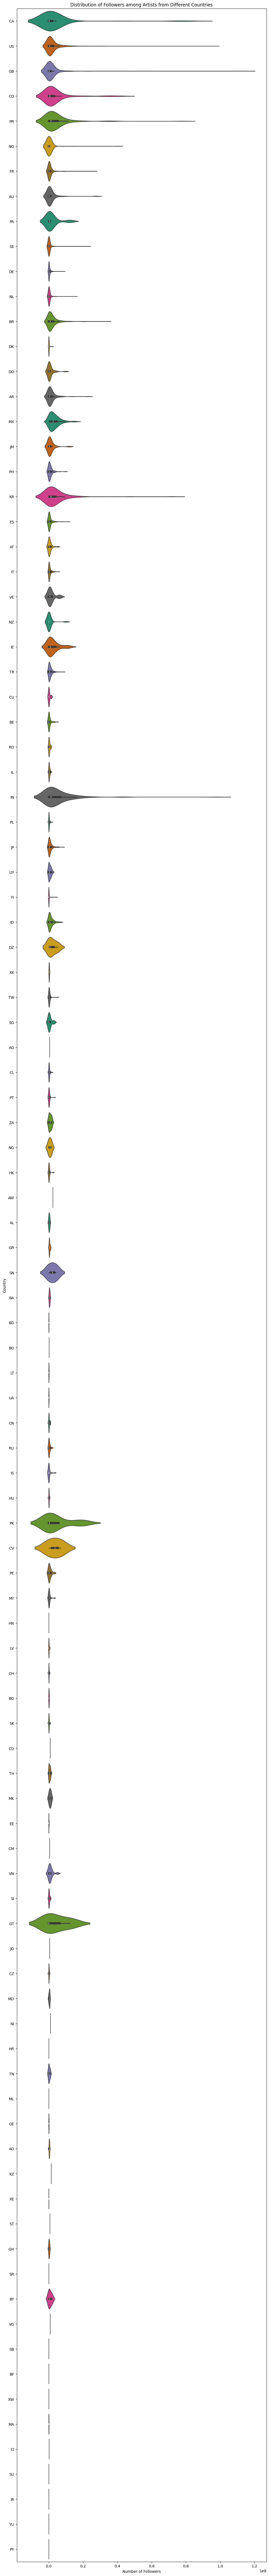

In [18]:
## Enter your code here
figsize = (12, 1.2 * len(artists_df['Country'].unique()))
plt.figure(figsize=figsize)

sns.violinplot(
    data=artists_df,
    x='Followers',
    y='Country',
    inner='box',
    palette='Dark2'
)

plt.title('Distribution of Followers among Artists from Different Countries')
plt.xlabel('Number of Followers')
plt.ylabel('Country')

plt.show()


## 3. GroupBy Exercises

**Question 2:** Based on `songs_df` dataframe what is the count of songs per artist?

**Hint:** use `groupby` operation on `songs_df` and aggregate each group with respect to `count`.

In [19]:
## Enter code here
songs_per_artist = songs_df.groupby('Artist Name')['Track Name'].count()
songs_per_artist


,Track Name
Artist Name,
2 Chainz,90
21 Savage,100
5 Seconds of Summer,90
6ix9ine,90
A Boogie Wit da Hoodie,90
...,...
beabadoobee,90
benny blanco,90
blackbear,90


It appears that there are duplicated rows in the `songs_df`. To address this, we can eliminate the duplicate rows using the provided code. Subsequently, we recalculate the song count per artist on the modified `songs_df`. Notably, we observe that the maximum count of songs per artist is now 10, consistent with the dataset descriptions available on the Kaggle website.

In [20]:
## Enter code here
songs_df = songs_df.drop_duplicates(subset=['Artist Name', 'Track Name'])

songs_per_artist = (
    songs_df
    .groupby('Artist Name')['Track Name']
    .count()
)

songs_per_artist


,Track Name
Artist Name,
2 Chainz,10
21 Savage,10
5 Seconds of Summer,10
6ix9ine,10
A Boogie Wit da Hoodie,10
...,...
beabadoobee,10
benny blanco,10
blackbear,9


**Question 3:** Add a column to `artists_df` that shows the count of albums per artist. Name this column as `Count Albums`. What is the count of Albums for the artist "Drake"? Can you print the unique values?

In [21]:
## Enter your code below
album_counts = (
    songs_df
    .drop_duplicates(subset=['Artist Name', 'Album Name'])
    .groupby('Artist Name')['Album Name']
    .count()
    .reset_index(name='Count Albums')
)

# only can merge onece
artists_df = artists_df.merge(
    album_counts,
    left_on='Name',
    right_on='Artist Name',
    how='left'
)

artists_df.loc[
    artists_df['Name'] == 'Drake',
    'Count Albums'
]

artists_df['Count Albums'].unique()




array([ 6.,  7.,  3.,  9.,  8.,  4.,  5., 10.,  2., nan])

**Enter your answer by double clicking this cell**

## 4. Merge Operations

Lets try to combine both the dataframes into a single one.


**Question 4**: List down the common columns between the two dataframes ? *(Requires only textual answer)*

**Enter Answer:**
Artist ID, Popularity, URI

**Question 5:** Lets merge both the dataframes using `pd.merge()` based on `Artist ID` as key.

**Reference**: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [22]:
## Enter code

merged_df = pd.merge(
    songs_df,
    artists_df,
    on='Artist ID',
    how='inner'
)

merged_df.head()


,Album Type,Artist ID,Artist Name_x,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,...,Name,Gender,Age,Country,Genres,Popularity_y,Followers,URI,Artist Name_y,Count Albums
0,album,3TVXtAsR1Inumwj472S9r4,Drake,1,IDGAF (feat. Yeat),True,For All The Dogs,2023-10-06,23,True,...,Drake,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,Drake,6.0
1,album,3TVXtAsR1Inumwj472S9r4,Drake,2,First Person Shooter (feat. J. Cole),True,For All The Dogs,2023-10-06,23,True,...,Drake,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,Drake,6.0
2,album,3TVXtAsR1Inumwj472S9r4,Drake,3,Rich Baby Daddy (feat. Sexyy Red & SZA),True,For All The Dogs,2023-10-06,23,True,...,Drake,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,Drake,6.0
3,album,3TVXtAsR1Inumwj472S9r4,Drake,4,Jimmy Cooks (feat. 21 Savage),True,"Honestly, Nevermind",2022-06-17,14,True,...,Drake,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,Drake,6.0
4,album,3TVXtAsR1Inumwj472S9r4,Drake,5,One Dance,True,Views,2016-05-06,20,False,...,Drake,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,Drake,6.0


**Question 6:** Plot count of explicit songs across different artist genders.

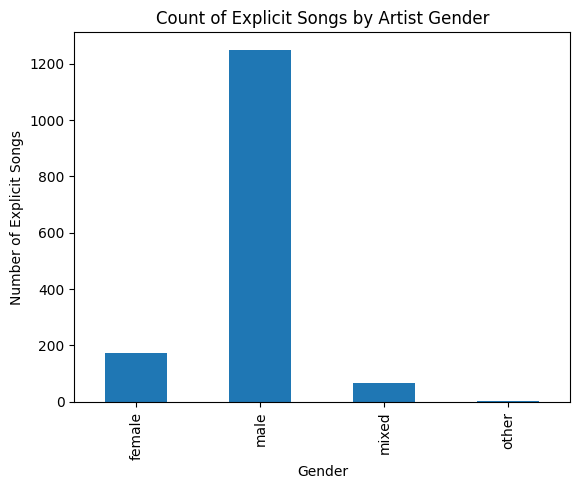

In [23]:
## Enter code
explicit_songs = merged_df[merged_df['Is Explicit'] == True]

explicit_counts = explicit_songs.groupby('Gender').size()

explicit_counts.plot(kind='bar')
plt.title('Count of Explicit Songs by Artist Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Explicit Songs')
plt.show()

**Question 7:** Calculate the average duration of songs from artists across different countries.

**Hint: Groupby Country and calculate `mean` per group.**

In [24]:
## Enter your code here
avg_duration_by_country = (
    merged_df
    .groupby('Country')['Song Duration']
    .mean()
)

avg_duration_by_country

,Song Duration
Country,
AR,224445.100000
AT,154857.300000
AU,203388.925000
BE,189972.100000
BR,189571.525000
CA,194611.246377
CO,202134.935714
CU,205908.150000
DE,173411.060000


## 5. Simple Probability

**Question 8:** Consider that you are randomly picking an artist from the **artists csv**. What is the probability that the chosen artist is **male**? *(Requires both code and textual answer)*

In [25]:
## Enter code
gender_probs = artists_df['Gender'].value_counts(normalize=True)
male_prob = gender_probs.get('male', 0)

male_prob


np.float64(0.543236684123132)


Textual Answer: 0.543236684123132

**Question 9:** What is the probability of choosing an
 artist who is *female**?

In [26]:
## Enter code
female_prob = gender_probs.get('female', 0)
female_prob


np.float64(0.18559202963341423)

**Question 10:** Probabilities of all possible values must add up to one. What are the other values that are appearing in `Gender` column and what is the probability for each of them?

In [27]:
## Enter your code here
other_genders = gender_probs.drop(['male', 'female'], errors='ignore')
other_genders


,proportion
Gender,
mixed,0.270405
other,0.000766


**Enter your answer by double clicking this cell**

**Answer:** mixed=0.270405 and other=0.000766

## 6. Conditional Probability

**Question 11:** What is the probability of randomly choosing a **male artist given that he is from US** ?

The above question requires you to find **conditional probability**.
Consider two events **A and B**. The probability of **A given B** can be computed using the below formula.

\begin{align}
    P(A \mid B) = \frac{P(A \cap B)}{P(B)}
\end{align}

In [28]:
## Enter your code here

us_artists = artists_df[artists_df['Country'] == 'US']


us_male_artists = us_artists[us_artists['Gender'] == 'male']


prob_male_given_us = len(us_male_artists) / len(us_artists)

prob_male_given_us


0.5410107705053853

**Question 12:** What is the probability of choosing a **female artist given that she is from Canada *(Country code for Canada : CA)*** ?

In [29]:
## Enter your code here

ca_artists = artists_df[artists_df['Country'] == 'CA']


ca_female_artists = ca_artists[ca_artists['Gender'] == 'female']


prob_female_given_ca = len(ca_female_artists) / len(ca_artists)

prob_female_given_ca


0.25842696629213485

## 7. Correlations
**Question 13:** Plot a scatter plot showing `Popularity` vs. `Followers` for artists.
Then test if there is any significant correlations between `Popularity` and `Followers`? What does this mean/imply? (The takeaway message)

*Use the `pearsonr` function from the package `scipy.stats`*

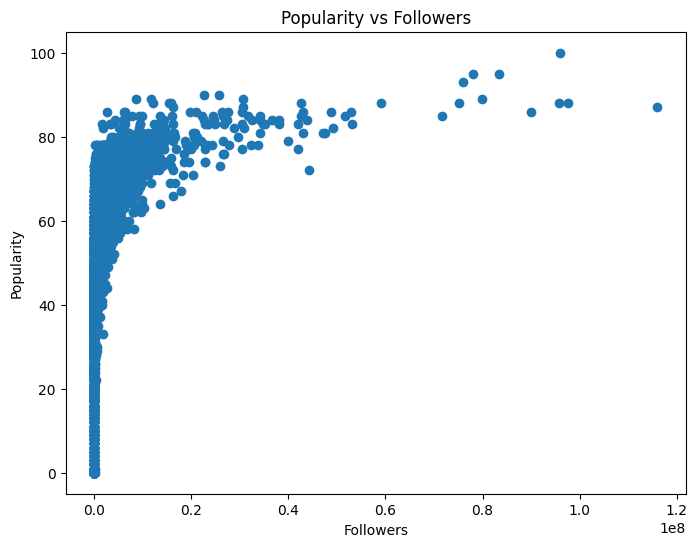

(np.float64(0.40522498829603903), np.float64(0.0))

In [30]:
## Enter code

from scipy.stats import pearsonr
df_pf = artists_df[['Popularity', 'Followers']].dropna()


plt.figure(figsize=(8, 6))
plt.scatter(df_pf['Followers'], df_pf['Popularity'])
plt.xlabel('Followers')
plt.ylabel('Popularity')
plt.title('Popularity vs Followers')
plt.show()


r_pf, p_pf = pearsonr(df_pf['Popularity'], df_pf['Followers'])
r_pf, p_pf


**Question 14:** For each artist, is there a significant correlation between the variables `Popularity` and `Age`, what about between `Followers` and `Age`? What does this imply?

In [31]:
## Enter code

df_pa = artists_df[['Popularity', 'Age']].dropna()
df_fa = artists_df[['Followers', 'Age']].dropna()


r_pa, p_pa = pearsonr(df_pa['Popularity'], df_pa['Age'])


r_fa, p_fa = pearsonr(df_fa['Followers'], df_fa['Age'])

r_pa, p_pa, r_fa, p_fa

(np.float64(0.2084525173404841),
 np.float64(1.2150813490936417e-93),
 np.float64(0.10171870524373111),
 np.float64(3.005789969467003e-23))

**Answer:**<br>
Popularity and Age show a weak but statistically significant positive correlation, while Followers and Age also show a weak yet significant positive correlation (p < 0.05). This implies that older artists tend to be slightly more popular and have more followers, though age is not a strong predictor of either. <br><br>
**Question 15:** In the `songs_df`, is there a correlation between the variables `Popularity` and `Artist Song Rank`, what about between `Popularity` and `Song Duration`? Are the correlations significant? What does this imply?


In [32]:
## Enter your code here

df_pr = songs_df[['Popularity', 'Artist Song Rank']].dropna()
df_pd = songs_df[['Popularity', 'Song Duration']].dropna()


r_pr, p_pr = pearsonr(df_pr['Popularity'], df_pr['Artist Song Rank'])


r_pd, p_pd = pearsonr(df_pd['Popularity'], df_pd['Song Duration'])

r_pr, p_pr, r_pd, p_pd

(np.float64(-0.33707630941648076),
 np.float64(1.1938412714122639e-107),
 np.float64(0.08598079137560617),
 np.float64(4.585195376290033e-08))

**Enter your answer by double clicking this cell** <br>
Popularity is moderately and significantly negatively correlated with Artist Song Rank (r ≈ −0.34, p < 0.05), indicating that higher-ranked songs tend to be more popular. Popularity has a very weak positive but statistically significant correlation with Song Duration (r ≈ 0.09), suggesting song length has little practical impact on popularity.<br>

## 8. T-Test

**We can use `ttest_ind` function from the package `scipy.stats`.**

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

**Question 16:** Generate a violinplot illustrating the distribution of `Age` for artists from Jamaica (JM) and Czech Republic (CZ). Subsequently, perform an t-test to determine if the means of these distributions exhibit significant differences.


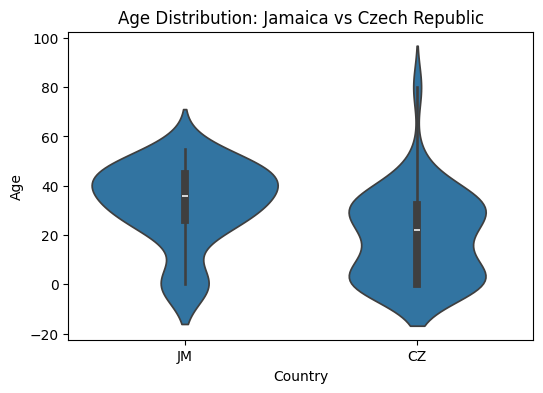

(np.float64(3.4265595223421084), np.float64(0.0010506071933920299))

In [33]:
##Enter code
from scipy.stats import ttest_ind

age_jm = artists_df.loc[artists_df['Country'] == 'JM', 'Age'].dropna()
age_cz = artists_df.loc[artists_df['Country'] == 'CZ', 'Age'].dropna()

age_df = artists_df[artists_df['Country'].isin(['JM', 'CZ'])][['Country', 'Age']].dropna()

plt.figure(figsize=(6, 4))
sns.violinplot(data=age_df, x='Country', y='Age', inner='box')
plt.title('Age Distribution: Jamaica vs Czech Republic')
plt.show()

t_stat, p_value = ttest_ind(age_jm, age_cz, equal_var=False)
t_stat, p_value


**Question 17:** Illustrate the `Followers` distribution for artists from Iceland (IS) and Russia (RU) using a violinplot. Are there significant differences in the distributions?


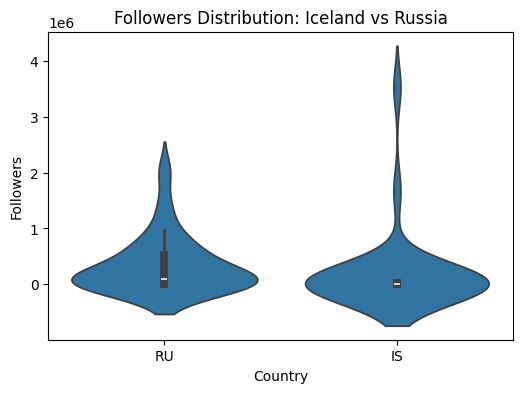

(np.float64(-0.8419888516167539), np.float64(0.40393450290239796))

In [34]:
## Enter your code here

followers_is = artists_df.loc[artists_df['Country'] == 'IS', 'Followers'].dropna()
followers_ru = artists_df.loc[artists_df['Country'] == 'RU', 'Followers'].dropna()

followers_df = artists_df[artists_df['Country'].isin(['IS', 'RU'])][
    ['Country', 'Followers']
].dropna()

plt.figure(figsize=(6, 4))
sns.violinplot(data=followers_df, x='Country', y='Followers', inner='box')
plt.title('Followers Distribution: Iceland vs Russia')
plt.show()

t_stat_f, p_value_f = ttest_ind(followers_is, followers_ru, equal_var=False)
t_stat_f, p_value_f


## 9. Analysis of Variance (ANOVA)
ANOVA is a statistical method used for analyzing the differences in means in three or more groups.

Null hypothesis: Groups means are equal (no variation in means of groups)

$H0: \mu 1=\mu 2=…=\mu p$


Alternative hypothesis: At least, one group mean is different from other groups

$H1:$ All $\mu$ are not equal

**Question 18:** Generate a violinplot illustrating the distribution of `Followers` for artists from each of the categories of male, female, and mixed. Subsequently, perform an ANOVA test to determine if the means of these three distributions exhibit significant differences.

**The Anova test is developed by `scipy.stats` as `f_oneway`.**

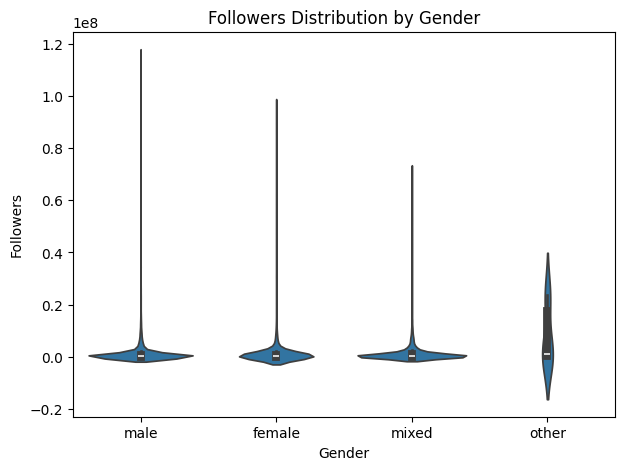

(np.float64(0.9979540979942357), np.float64(0.3686797989649758))

In [35]:
## Enter code
from scipy.stats import f_oneway

followers_gender_df = artists_df[['Gender', 'Followers']].dropna()

plt.figure(figsize=(7, 5))
sns.violinplot(
    data=followers_gender_df,
    x='Gender',
    y='Followers',
    inner='box'
)
plt.title('Followers Distribution by Gender')
plt.show()

followers_male = followers_gender_df.loc[
    followers_gender_df['Gender'] == 'male', 'Followers'
]
followers_female = followers_gender_df.loc[
    followers_gender_df['Gender'] == 'female', 'Followers'
]
followers_mixed = followers_gender_df.loc[
    followers_gender_df['Gender'] == 'mixed', 'Followers'
]

f_stat, p_value = f_oneway(
    followers_male,
    followers_female,
    followers_mixed
)

f_stat, p_value

**Answer:** <br>
The ANOVA test shows no statistically significant difference in mean followers among male, female, and mixed artists (p > 0.05).<br>

**Question 19:** Generate a violinplot illustrating the distribution of `Age` for male, female, and mixed artists. Subsequently, perform an ANOVA test to determine if the means of these three distributions exhibit significant differences.

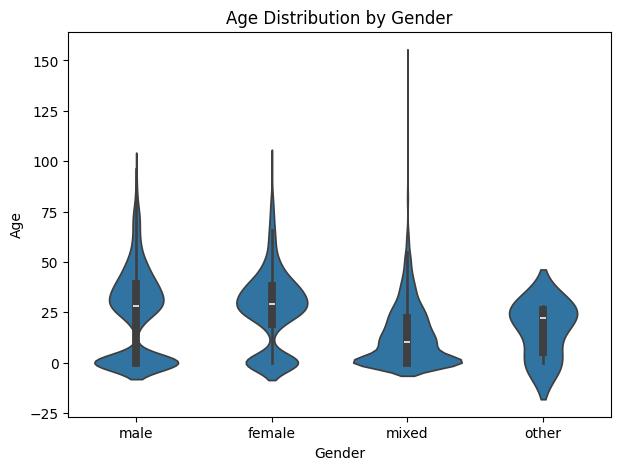

(np.float64(285.10184987806593), np.float64(3.0754620747982536e-120))

In [36]:
##Enter code

age_gender_df = artists_df[['Gender', 'Age']].dropna()

plt.figure(figsize=(7, 5))
sns.violinplot(
    data=age_gender_df,
    x='Gender',
    y='Age',
    inner='box'
)
plt.title('Age Distribution by Gender')
plt.show()

age_male = age_gender_df.loc[
    age_gender_df['Gender'] == 'male', 'Age'
]
age_female = age_gender_df.loc[
    age_gender_df['Gender'] == 'female', 'Age'
]
age_mixed = age_gender_df.loc[
    age_gender_df['Gender'] == 'mixed', 'Age'
]

f_stat_age, p_value_age = f_oneway(
    age_male,
    age_female,
    age_mixed
)

f_stat_age, p_value_age


**Answer:**<br>
The ANOVA test shows a statistically significant difference in mean age among male, female, and mixed artists (p < 0.05), indicating that at least one group has a different average age.<br>

**Question 20:** Generate a violinplot illustrating the distribution of `Age` for artists from Jamaica (JM), Austria (AT), and Philippines (PH). Subsequently, perform an ANOVA test to determine if the means of these three distributions exhibit significant differences.

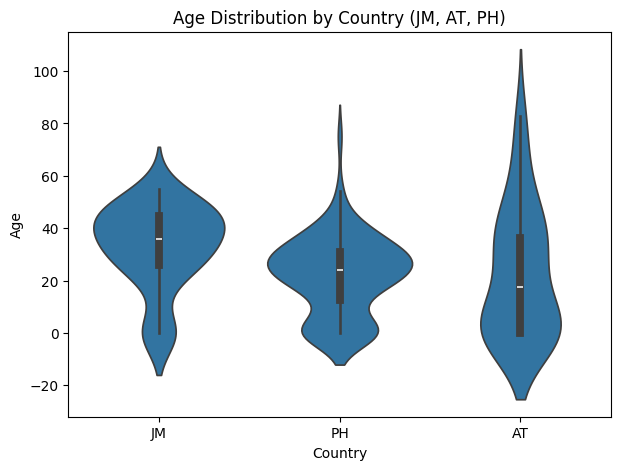

(np.float64(4.653806388091095), np.float64(0.010992515913396516))

In [37]:
## Enter your code here

age_country_df = artists_df[
    artists_df['Country'].isin(['JM', 'AT', 'PH'])
][['Country', 'Age']].dropna()

plt.figure(figsize=(7, 5))
sns.violinplot(
    data=age_country_df,
    x='Country',
    y='Age',
    inner='box'
)
plt.title('Age Distribution by Country (JM, AT, PH)')
plt.show()

age_jm = age_country_df.loc[age_country_df['Country'] == 'JM', 'Age']
age_at = age_country_df.loc[age_country_df['Country'] == 'AT', 'Age']
age_ph = age_country_df.loc[age_country_df['Country'] == 'PH', 'Age']

f_stat, p_value = f_oneway(age_jm, age_at, age_ph)

f_stat, p_value
